In [1]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,sklearn

CPython 3.5.2
IPython 6.2.1

numpy 1.14.2
scipy 1.0.0
pandas 0.22.0
matplotlib 2.2.0
sklearn 0.19.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.9.60-linuxkit-aufs
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           7973         274        2612           5        5086        7356
Swap:          1023           0        1023


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

In [4]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [5]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
pd.DataFrame(X, columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
import xgboost, lightgbm

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb = xgboost.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
prediction = xgb.predict_proba(X_test)

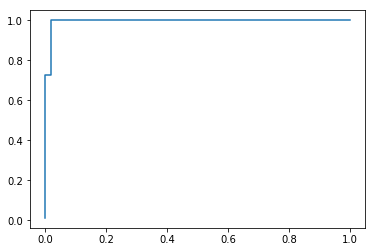

In [8]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);

In [9]:
import fbprophet

In [10]:
!vw --version

8.5.0


In [11]:
import keras

Using TensorFlow backend.


In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [13]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [14]:
dot_data = StringIO()
export_graphviz(tree, feature_names=cancer.feature_names, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb7\x00\x00\x01\xf1\x08\x06\x00\x00\x00^O\x81\x18\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw|\x8f\xd7\xfb\xc7\xf1w$!\x04!V\xedU\x145J\x08A\xed\xd5a\xaf\xd6(\xadU\xa3j}m\xaa\xf6(j\xd5lkKb\xef\x1d1\x13b\xa5\x8d\xd9\x96\x1aA\xc8NH\x90|~\x7fh\xf2\x13I\xc8\xfe$\xf1z>\x1e\x1e\x95s\xce}\x9d\xeb\xbe\xf9\xf4\x11\x97\xe3\xbaM\x0c\x06\x83A\x00\x00\x00\x00\x00\x00\x00\x00\xa4\x1d\x8e\x19\x8c\x9d\x01\x00\x00\x00\x00\x00\x00\x00\x00\xf1Eq\x1b\x00\x00\x00\x00\x00\x00\x00\x90\xe6P\xdc\x06\x00\x00\x00\x00\x00\x00\x00\xa49f\xc6N\x00\x00\x00 \xad\t\t\t\xd1\x9e={\x14\x16\x16f\xecT\x00\xbcc\xaaU\xab\xa6b\xc5\x8a\x19;\r\x00\x00\x80T\x81\xe26\x00\x00@<\xed\xd9\xb3Gm\xdb\xb65v\x1a\x00\xdeA\x9d:u\xd2\x86\r\x1b\x8c\x9d\x06\x00\x00@\xaa@q\x1b\x00\x00 \x9e^\xbcx!Ir\xf4\x082r&\x00\xde%s\x86t\xe5_\x8c\x00\x00\x00\xbc\x82\x9e\xdb\x00\x00\x00\x00\x00\x00\x00\x804\x87\xe26\x00\x00\x00\x00\x00\x00\x00 \xcd\xa1\xb8\r\x00\x00\x00\x00\x00\x00\x00Hs(n\x03\x00\x00\x00\x00\x00\x00\x00\xd2\x1c\x8a\xdb\x00\x00\x00\x00\x00\x00\x00\x804\xc7\xcc\xd8\t\x00\x00\x00\x00\x80!<\\\xce;\xd6k\xc3\xfc\x1f\xe5\xf3\xd0S\x8e\x1eAo\\\xef~\xea\x88\xb6,\x9b\xa5\x7f._\x90$\x95,_E\xad{\x0fW\xc5\x9a\xf5\xa3\xadm_>k\xacq\xde\xb6\xcf\xabB\x9f\x06k\xc7o?\xeb\xf4\xfe\xadzp\xe7\xa6\xcc\xcc\xccT\xec\x83\x8a\xfa\xa4k\x7f\xd5h\xdc2\xd9\xf6\x05\x00\x00@\xcc8\xb9\r\x00\x00\x80ti\\\xd7\xc6\x1a\xd7\xb5\xb1\xb1\xd3@\x1c\\:uX\xc3\xdb\xda\xe9\xc8\x96\xd5\xf2y\xe8\xf9\xd6\xf5G\xb7\xaf\xd3\xa4^-T\xa4ty-\xda\xef\xa1E\xfb=T\xb8T9M\xee\xd5B\xc7vnL\x96\x1c\x9f\x04\x06hl\xe7F\xda\xfe\xeb\xcfj\xde\xb9\xaf~9xY\xf3\xf7\\\x92]\xb3\xb6\x9a?\xe2\x1bm[\xf1S\xb2\xec\x0b\x00\x00\x80\xd8qr\x1b\x00\x00\x00o\x14q\xfa4\xad\x9d45\x84\x87\x1b;\x85Hi\xf5\x19\xa6\x94_\xa7\x0eS\xe7\xc1?\xaaz\xc3\xcf\xdfx\xdaY\x92|\x1f=\xd0\x8aICT\xba\xb2\xadz\x8c\x9a%\x13\x13\x13IR\x8fQ\xb3\xf4\xf7\x9f\xe7\xb5b\xd2\xf7\xaad\xd7@V\xb9\xf2F\xb9.\xb1\xcf\xde~\xd1d\xdd\xba\xf6\x87\xba\x0e\x9b\xa2\xc6\x1d\xbe\x89\x1co\xf6e\x1f\x05\x05\xf8j\xc3\xfc\x1fU\xb5\xde\'*\xfc~\xd9$\xdd\x17\x00\x00\x00\xb1\xe3\xe46\x00\x00\x00\xd2\xa5\xc9\xeb\x0ek\xf2\xba\xc3\xc6N#\xcdy|\xff\x8e\xb6\xad\x9c\xa3\xa1\xadmSl\xcf9\xdb\xcf\xaaz\xc3\xcf\xe3\xb4\xf6\xc8\xe6U\n}\x1a\xac\x06\xad\xbbF\x16\xb6%\xc9\xc4\xc4D\xf5\xdbt\xd5\xd3\xe0 \x1d\xd9\xb2:\xc9st=\xb0]\x92T\xb3I\xabhs\xb5?\xe9\xa0\xf0\xb00\x1d\xda\xf4[\x92\xef\x0b\x00\x00\x80\xd8qr\x1b\x00\x00\x00x\xc7\x05\xf9\xfb\xea\xf4\xfe-:\xbe\xcb^W\xcf\x9f\x96I\x86\x0c\xfa\xd0\xb6n\x8a\xedoj\x1a\xf7?\x96\xb8\xbb8I\x92JU\xac\x16m.b\xec\xd2\xc9\xc3j\xddkX\xd2$\xf7\x1f\xbf\xc7\x0f%I9r\xe7\x8b6\x97+_\x01I\xd2\x15\xb7\x93I\xba\'\x00\x00\x00\xde\x8c\xe26\x00\x00@2{\xbd\xcd\xc2\xc8\xc5\x8e\xaaZ\xb7\xb9$i\xdf\x86eZ9y\x88\xe6\xeepS\xa1\x92\x1fH\x92\x8e\xed\xdc\xa8\x05#{F\xae\x8fhk\xe0\xf7\xf8\xa1\xec\x17N\xd1\xf9c\xfb\xe4\xef\xfdHV\xb9\xf2\xa8j\xdd\xe6\xea8`L\x94\x16\x0c\xaf\xee\xb7p\xdf\x1fZ={\x8c<\\\x9d\x15\x1c\xe8\x1f\x19\xefI`\x80\x1c\x16O\xd1\xd9#\xbb\xe5\xebu_\x992gQ\x81\xe2\xa5U\xa6\xb2\xad\xec\x9a\xb5\xd1\xfb\x15l\xa2\xc5\x8a\xf8y\x83\xb6_\xe9\xdb\x1f\x17\xc5\xf9\x9e\xe7\xeep\xd3\xaa\x19#u\xed\xa2\x8b\xc2\xc3\r*_\xad\xb6\xba\r\x9f\xaa\x82%\xcaD\xb9\xc6\xdf\xe7\x91\x1c\x16N\x91\xdb\xd1=\xf2\xf7~\xa4\xec\xd6\xb9U\xf5\xe3f\xea8pl\x94\x82b\\\xee\xef\xd55\xaf\xb6\x85xu|\x99\xd3\r\xad\x9c2T\x97N\x1d\x96\x99yFU\xad\xd7\\_\x8f\x9a\xad\xe0\x00_\xfd:u\xb8<\xce\x1eSF\x8b,\xfa\xa8vcu\x1f5S\x96\xd9\xac\x12\x9dol\xcf0)\xef=\xae\x9e\x85<\x95\x9b\xd3\x1e\x1d\xdfe\xaf\x0b\'\x0e*\xec\xc5s\x95(\xff\x91\xbe\xfa\xdft\xd5\xfa\xa4]\x8cE\xdc\xb7\xb5\x0cy]r\xb4\xe4\xb8\xf7\xf75IR\xae\xfc\x85\xa2\xcd\xe5\xce_\xf8\xe5\x9a\x9b\xd7\xa3\xcdm\xf8y\xa2\x8e\xefv\x90\xaf\xd7}YY\xe7\xd1G\x1f7U\x87\xfe\xa3\x953\xcf{q\xda7\xbbun\xf9>z \xbf\xc7\x0f\x95\xa7`\xd1(s~\xde^\x92\xa4\x87wo&\xf9\xbe\x00\x00\x00\x88\x1d\xc5m\x00\x00\x80d\xe6\xe8\x11\xa4\x99\x03;\xe9\xec\x91]\xea>bFda[\x92\x9c\xb7\xad{\xf9\xdf\x1d\x1b\xd4y\xf0DI\xd2\xc7\x9fw\x92$\x9d\xdc\xbbI\xa3\x16o\x

![](https://habrastorage.org/webt/dh/_y/z4/dh_yz4ufh_uqgv3i1c-z4h4dm6u.jpeg)

In [15]:
import torch
from torch import FloatTensor
from torch.autograd import Variable


$X = \begin{bmatrix} 1 & 1 \\ 1 & 1\end{bmatrix}$, $Z = 2 * (X + 2) ^ 2$, $out = \bar{Z}$

In [16]:
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [17]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [18]:
z = y * y * 2
z

Variable containing:
 18  18
 18  18
[torch.FloatTensor of size 2x2]

In [19]:
out = z.mean()
out

Variable containing:
 18
[torch.FloatTensor of size 1]

In [20]:
out.backward()

In [21]:
x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]